### Importación de datos



In [81]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# Pasos Preliminares:
### estructurando los datos para que estén correctamente esrtucturados antes de comenzar con el análisis

In [82]:
# Convertimos los DataFrames a listas de diccionarios
datos_tienda1 = tienda1.to_dict('records')
datos_tienda2 = tienda2.to_dict('records')
datos_tienda3 = tienda3.to_dict('records')
datos_tienda4 = tienda4.to_dict('records')


In [83]:
# verificamos un fila de ejemplo
print('Tienda 1:', datos_tienda1[0])

Tienda 1: {'Producto': 'Asistente virtual', 'Categoría del Producto': 'Electrónicos', 'Precio': 164300.0, 'Costo de envío': 6900.0, 'Fecha de Compra': '16/01/2021', 'Vendedor': 'Pedro Gomez', 'Lugar de Compra': 'Bogotá', 'Calificación': 4, 'Método de pago': 'Tarjeta de crédito', 'Cantidad de cuotas': 8, 'lat': 4.60971, 'lon': -74.08175}


In [84]:
# ejecutaremos una función para validar los datos
def verificar_datos(tienda, nombre):
    errores = 0
    for i, fila in enumerate(tienda):
        if 'Precio' not in fila:
            print(f"{nombre} - Fila {i}: no tiene el campo 'Precio'")
            errores += 1
        elif not isinstance(fila['Precio'], (int, float)):
            print(f"{nombre} - Fila {i}: 'Precio' no es numérico → {fila['Precio']}")
            errores += 1
    if errores == 0:
        print(f"{nombre}: todos los registros son válidos.")
    else:
        print(f"{nombre}: se encontraron {errores} registros inválidos.")

# Ejecuta la verificación en cada tienda
verificar_datos(datos_tienda1, "Tienda 1")
verificar_datos(datos_tienda2, "Tienda 2")
verificar_datos(datos_tienda3, "Tienda 3")
verificar_datos(datos_tienda4, "Tienda 4")

Tienda 1: todos los registros son válidos.
Tienda 2: todos los registros son válidos.
Tienda 3: todos los registros son válidos.
Tienda 4: todos los registros son válidos.


In [85]:
# Función que permite extraer los precios de una tienda
def extraer_precios(tienda):
    precios = []
    for fila in tienda:
        precios.append(fila['Precio'])
    return precios

# aplicamos la función a cada tienda
precios_tienda1 = extraer_precios(datos_tienda1)
precios_tienda2 = extraer_precios(datos_tienda2)
precios_tienda3 = extraer_precios(datos_tienda3)
precios_tienda4 = extraer_precios(datos_tienda4)

# verificamos que los 5 primeros precios se hayan extraído bien de manmera visual
print("Primeros precios tienda 1:", precios_tienda1[:5])
print("Primeros precios tienda 2:", precios_tienda2[:5])
print("Primeros precios tienda 3:", precios_tienda3[:5])
print("Primeros precios tienda 4:", precios_tienda4[:5])

Primeros precios tienda 1: [164300.0, 192300.0, 209600.0, 757500.0, 335200.0]
Primeros precios tienda 2: [283600.0, 76800.0, 443300.0, 906200.0, 397800.0]
Primeros precios tienda 3: [1285100.0, 290100.0, 303500.0, 58800.0, 521100.0]
Primeros precios tienda 4: [1084800.0, 473800.0, 23700.0, 57700.0, 138900.0]


#1. Análisis de facturación



In [86]:
# Función para calcular el total facturado
def calcular_facturacion_total(lista_precios):
    total = 0
    for precio in lista_precios:
        total += precio
    return total

# Calculamos el total por tienda
total1 = calcular_facturacion_total(precios_tienda1)
total2 = calcular_facturacion_total(precios_tienda2)
total3 = calcular_facturacion_total(precios_tienda3)
total4 = calcular_facturacion_total(precios_tienda4)

# Mostramos resultados con formato de moneda
print("Facturación total Tienda 1: ${:,.2f}".format(total1))
print("Facturación total Tienda 2: ${:,.2f}".format(total2))
print("Facturación total Tienda 3: ${:,.2f}".format(total3))
print("Facturación total Tienda 4: ${:,.2f}".format(total4))


Facturación total Tienda 1: $1,150,880,400.00
Facturación total Tienda 2: $1,116,343,500.00
Facturación total Tienda 3: $1,098,019,600.00
Facturación total Tienda 4: $1,038,375,700.00


In [87]:
# creamos un diccionario con los totales por tienda
totales = {
    "Tienda 1": total1,
    "Tienda 2": total2,
    "Tienda 3": total3,
    "Tienda 4": total4
}

# Ordenamos de mayor a menor facturación
ranking_facturacion = sorted(totales.items(), key=lambda x: x[1], reverse=True)

# Mostramos el ranking con formato de moneda
print("\n💵 Ranking de facturación total por tienda:")
for i, (tienda, monto) in enumerate(ranking_facturacion, start=1):
    print(f"{i}. {tienda}: ${monto:,.2f}")


💵 Ranking de facturación total por tienda:
1. Tienda 1: $1,150,880,400.00
2. Tienda 2: $1,116,343,500.00
3. Tienda 3: $1,098,019,600.00
4. Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [88]:
# generamos una función para extraer categorías
def extraer_categorias(tienda):
    categorias = []
    for fila in tienda:
        categorias.append(fila['Categoría del Producto'])
    return categorias

# Aplicamos dicha función a cada tienda
categorias_tienda1 = extraer_categorias(datos_tienda1)
categorias_tienda2 = extraer_categorias(datos_tienda2)
categorias_tienda3 = extraer_categorias(datos_tienda3)
categorias_tienda4 = extraer_categorias(datos_tienda4)

# verificamos las 5 primeras categorias, para asegurarnos que el código funciona.
print("Categorías tienda 1:", categorias_tienda1[:5])
print("Categorías tienda 2:", categorias_tienda2[:5])
print("Categorías tienda 3:", categorias_tienda3[:5])
print("Categorías tienda 4:", categorias_tienda4[:5])

Categorías tienda 1: ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Muebles']
Categorías tienda 2: ['Muebles', 'Instrumentos musicales', 'Muebles', 'Muebles', 'Muebles']
Categorías tienda 3: ['Electrodomésticos', 'Muebles', 'Instrumentos musicales', 'Deportes y diversión', 'Muebles']
Categorías tienda 4: ['Electrodomésticos', 'Muebles', 'Deportes y diversión', 'Libros', 'Electrónicos']


In [89]:
# creamos una función para contar ocurrencias por categoría
def contar_categorias(lista_categorias):
    conteo = {}
    for categoria in lista_categorias:
        if categoria in conteo:
            conteo[categoria] += 1
        else:
            conteo[categoria] = 1
    return conteo

# aplicamos dicha función a cada tienda
conteo1 = contar_categorias(categorias_tienda1)
conteo2 = contar_categorias(categorias_tienda2)
conteo3 = contar_categorias(categorias_tienda3)
conteo4 = contar_categorias(categorias_tienda4)

# mostramos los resultados
print("Ventas por categoría - Tienda 1:", conteo1)
print("Ventas por categoría - Tienda 2:", conteo2)
print("Ventas por categoría - Tienda 3:", conteo3)
print("Ventas por categoría - Tienda 4:", conteo4)

Ventas por categoría - Tienda 1: {'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}
Ventas por categoría - Tienda 2: {'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}
Ventas por categoría - Tienda 3: {'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}
Ventas por categoría - Tienda 4: {'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}


In [90]:
# función para encontrar la(s) categoría(s) más vendida(s)
def categoria_mas_vendida(conteo):
    maximo = max(conteo.values())
    populares = [categoria for categoria, cantidad in conteo.items() if cantidad == maximo]
    return populares, maximo

# Aplicamos dicha función a cada tienda
populares1, max1 = categoria_mas_vendida(conteo1)
populares2, max2 = categoria_mas_vendida(conteo2)
populares3, max3 = categoria_mas_vendida(conteo3)
populares4, max4 = categoria_mas_vendida(conteo4)

# mostramos los resultados
print(f"Tienda 1 - Categoría(s) más vendida(s): {populares1} con {max1} ventas")
print(f"Tienda 2 - Categoría(s) más vendida(s): {populares2} con {max2} ventas")
print(f"Tienda 3 - Categoría(s) más vendida(s): {populares3} con {max3} ventas")
print(f"Tienda 4 - Categoría(s) más vendida(s): {populares4} con {max4} ventas")

Tienda 1 - Categoría(s) más vendida(s): ['Muebles'] con 465 ventas
Tienda 2 - Categoría(s) más vendida(s): ['Muebles'] con 442 ventas
Tienda 3 - Categoría(s) más vendida(s): ['Muebles'] con 499 ventas
Tienda 4 - Categoría(s) más vendida(s): ['Muebles'] con 480 ventas


# 3. Calificación promedio de la tienda


In [91]:
# definimos una función que extraiga las calificaciones de una tienda
def extraer_calificaciones(tienda):
    calificaciones = []
    for fila in tienda:
        calificaciones.append(fila['Calificación'])
    return calificaciones

# aplicamos dicha función a cada tienda
calificaciones_tienda1 = extraer_calificaciones(datos_tienda1)
calificaciones_tienda2 = extraer_calificaciones(datos_tienda2)
calificaciones_tienda3 = extraer_calificaciones(datos_tienda3)
calificaciones_tienda4 = extraer_calificaciones(datos_tienda4)

# verificamos que el código funcione mostrando las primeras 5 calificaciones de cada tienda
print("Calificaciones Tienda 1:", calificaciones_tienda1[:5])
print("Calificaciones Tienda 2:", calificaciones_tienda2[:5])
print("Calificaciones Tienda 3:", calificaciones_tienda3[:5])
print("Calificaciones Tienda 4:", calificaciones_tienda4[:5])

Calificaciones Tienda 1: [4, 1, 1, 4, 5]
Calificaciones Tienda 2: [1, 3, 5, 5, 4]
Calificaciones Tienda 3: [4, 3, 5, 4, 1]
Calificaciones Tienda 4: [4, 5, 5, 3, 4]


In [92]:
# creamos una función para calcular el promedio de calificaciones
def calcular_promedio(lista):
    if len(lista) == 0:
        return 0
    return sum(lista) / len(lista)

# Aplicamos dicha función a cada tienda
promedio_calificacion1 = calcular_promedio(calificaciones_tienda1)
promedio_calificacion2 = calcular_promedio(calificaciones_tienda2)
promedio_calificacion3 = calcular_promedio(calificaciones_tienda3)
promedio_calificacion4 = calcular_promedio(calificaciones_tienda4)

# mostramoslos resultados con 1 decimal
print("Calificación promedio Tienda 1: {:.2f}".format(promedio_calificacion1))
print("Calificación promedio Tienda 2: {:.2f}".format(promedio_calificacion2))
print("Calificación promedio Tienda 3: {:.2f}".format(promedio_calificacion3))
print("Calificación promedio Tienda 4: {:.2f}".format(promedio_calificacion4))

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


In [93]:
# crearemos un ranking de calificaciones
# 1ero hacemos un diccionario con los promedios de calificaciones por tienda
ranking_calificaciones = {
    "Tienda 1": promedio_calificacion1,
    "Tienda 2": promedio_calificacion2,
    "Tienda 3": promedio_calificacion3,
    "Tienda 4": promedio_calificacion4
}

# Ordenamos dicho ranking de mayor a menor
ranking_ordenado = sorted(ranking_calificaciones.items(), key=lambda x: x[1], reverse=True)

# mostramos el ranking
print("\n🏆 Ranking de calificación promedio por tienda:")
for i, (tienda, promedio) in enumerate(ranking_ordenado, start=1):
    print(f"{i}. {tienda}: {promedio:.2f}")


🏆 Ranking de calificación promedio por tienda:
1. Tienda 3: 4.05
2. Tienda 2: 4.04
3. Tienda 4: 4.00
4. Tienda 1: 3.98


# 4. Productos más y menos vendidos

In [94]:
# Creamos una funciónpara extraer productos vendidos de una tienda
def extraer_productos(tienda):
    productos = []
    for fila in tienda:
        productos.append(fila['Producto'])
    return productos

# Aplicamos dicha función a cada una de las tiendas
productos_tienda1 = extraer_productos(datos_tienda1)
productos_tienda2 = extraer_productos(datos_tienda2)
productos_tienda3 = extraer_productos(datos_tienda3)
productos_tienda4 = extraer_productos(datos_tienda4)

# verificamos algunos de los productos para saber que el código está correcto
print("Productos Tienda 1:", productos_tienda1[:5])
print("Productos Tienda 2:", productos_tienda2[:5])
print("Productos Tienda 3:", productos_tienda3[:5])
print("Productos Tienda 4:", productos_tienda4[:5])

Productos Tienda 1: ['Asistente virtual', 'Mesa de comedor', 'Juego de mesa', 'Microondas', 'Silla de oficina']
Productos Tienda 2: ['Silla de oficina', 'Pandereta', 'Cama king', 'Cama king', 'Silla de oficina']
Productos Tienda 3: ['Secadora de ropa', 'Mesa de noche', 'Guitarra acústica', 'Balón de voleibol', 'Armario']
Productos Tienda 4: ['Lavavajillas', 'Cama box', 'Balón de baloncesto', 'Modelado predictivo', 'Auriculares']


In [95]:
# ahora generamos una función que permita contar las ventas por producto
def contar_productos(lista_productos):
    conteo = {}
    for producto in lista_productos:
        if producto in conteo:
            conteo[producto] += 1
        else:
            conteo[producto] = 1
    return conteo

# aplicamos la función a cada tienda
conteo_productos1 = contar_productos(productos_tienda1)
conteo_productos2 = contar_productos(productos_tienda2)
conteo_productos3 = contar_productos(productos_tienda3)
conteo_productos4 = contar_productos(productos_tienda4)

# mostramos un ejemplo parcial de conteo para verificar que el código está correcto
print("Ventas por producto - Tienda 1 (ejemplo):")
for producto, cantidad in list(conteo_productos1.items())[:5]:
    print(f"{producto}: {cantidad} ventas")


Ventas por producto - Tienda 1 (ejemplo):
Asistente virtual: 40 ventas
Mesa de comedor: 40 ventas
Juego de mesa: 43 ventas
Microondas: 60 ventas
Silla de oficina: 46 ventas


In [96]:
# Para identificar los productos más y menos vendidos por tienda crearemos una función para obtenerlos
def productos_extremos(conteo):
    max_ventas = max(conteo.values())
    min_ventas = min(conteo.values())

    mas_vendidos = [producto for producto, cantidad in conteo.items() if cantidad == max_ventas]
    menos_vendidos = [producto for producto, cantidad in conteo.items() if cantidad == min_ventas]

    return mas_vendidos, max_ventas, menos_vendidos, min_ventas

# aplicamos dicha función a cada tienda
mas1, max1, menos1, min1 = productos_extremos(conteo_productos1)
mas2, max2, menos2, min2 = productos_extremos(conteo_productos2)
mas3, max3, menos3, min3 = productos_extremos(conteo_productos3)
mas4, max4, menos4, min4 = productos_extremos(conteo_productos4)

# mostramos los resultados
print(f"\nTienda 1 - Más vendidos: {mas1} ({max1} ventas) | Menos vendidos: {menos1} ({min1} venta/s)")
print(f"Tienda 2 - Más vendidos: {mas2} ({max2} ventas) | Menos vendidos: {menos2} ({min2} venta/s)")
print(f"Tienda 3 - Más vendidos: {mas3} ({max3} ventas) | Menos vendidos: {menos3} ({min3} venta/s)")
print(f"Tienda 4 - Más vendidos: {mas4} ({max4} ventas) | Menos vendidos: {menos4} ({min4} venta/s)")


Tienda 1 - Más vendidos: ['Microondas', 'TV LED UHD 4K', 'Armario'] (60 ventas) | Menos vendidos: ['Auriculares con micrófono', 'Celular ABXY'] (33 venta/s)
Tienda 2 - Más vendidos: ['Iniciando en programación'] (65 ventas) | Menos vendidos: ['Juego de mesa'] (32 venta/s)
Tienda 3 - Más vendidos: ['Kit de bancas'] (57 ventas) | Menos vendidos: ['Bloques de construcción'] (35 venta/s)
Tienda 4 - Más vendidos: ['Cama box'] (62 ventas) | Menos vendidos: ['Guitarra eléctrica'] (33 venta/s)


# 5. Envío promedio por tienda

In [97]:
# generamos una función para extraer los costos de envío de una tienda
def extraer_costos_envio(tienda):
    costos = []
    for fila in tienda:
        costos.append(fila['Costo de envío'])
    return costos

# aplicamos la función a cada tienda
envios_tienda1 = extraer_costos_envio(datos_tienda1)
envios_tienda2 = extraer_costos_envio(datos_tienda2)
envios_tienda3 = extraer_costos_envio(datos_tienda3)
envios_tienda4 = extraer_costos_envio(datos_tienda4)

# verificamos los primeros valores para cerciorarnos que el código esta correcto
print("Costos de envío - Tienda 1:", envios_tienda1[:5])
print("Costos de envío - Tienda 2:", envios_tienda2[:5])
print("Costos de envío - Tienda 3:", envios_tienda3[:5])
print("Costos de envío - Tienda 4:", envios_tienda4[:5])


Costos de envío - Tienda 1: [6900.0, 8400.0, 15900.0, 41000.0, 20200.0]
Costos de envío - Tienda 2: [15300.0, 2300.0, 23800.0, 46400.0, 19400.0]
Costos de envío - Tienda 3: [66600.0, 13600.0, 17400.0, 3300.0, 25900.0]
Costos de envío - Tienda 4: [56000.0, 25400.0, 0.0, 1300.0, 5600.0]


In [98]:
# definidmos una función para calcular el costo promedio de envío
def calcular_promedio(lista):
    if len(lista) == 0:
        return 0
    return sum(lista) / len(lista)

# calculamos el promedio de envío para cada tienda
prom_envio1 = calcular_promedio(envios_tienda1)
prom_envio2 = calcular_promedio(envios_tienda2)
prom_envio3 = calcular_promedio(envios_tienda3)
prom_envio4 = calcular_promedio(envios_tienda4)

#mostramos los resultados de cada tienda
print("Costo de envío promedio - Tienda 1: ${:,.2f}".format(prom_envio1))
print("Costo de envío promedio - Tienda 2: ${:,.2f}".format(prom_envio2))
print("Costo de envío promedio - Tienda 3: ${:,.2f}".format(prom_envio3))
print("Costo de envío promedio - Tienda 4: ${:,.2f}".format(prom_envio4))

Costo de envío promedio - Tienda 1: $26,018.61
Costo de envío promedio - Tienda 2: $25,216.24
Costo de envío promedio - Tienda 3: $24,805.68
Costo de envío promedio - Tienda 4: $23,459.46


In [99]:
# haremos un ranking para ello debemos definir un diccionario con los promedios de envío por tienda
ranking_envio = {
    "Tienda 1": prom_envio1,
    "Tienda 2": prom_envio2,
    "Tienda 3": prom_envio3,
    "Tienda 4": prom_envio4
}

# ordenamos de menor a mayor
ranking_envio_ordenado = sorted(ranking_envio.items(), key=lambda x: x[1])

# Mostramos el ranking con formato
print("\n📦 Ranking de costo de envío promedio por tienda (de menor a mayor):")
for i, (tienda, promedio) in enumerate(ranking_envio_ordenado, start=1):
    print(f"{i}. {tienda}: ${promedio:,.2f}")


📦 Ranking de costo de envío promedio por tienda (de menor a mayor):
1. Tienda 4: $23,459.46
2. Tienda 3: $24,805.68
3. Tienda 2: $25,216.24
4. Tienda 1: $26,018.61


# 6. Visualización

### Gráfico 1: Ingresos Totales Por tienda

In [100]:
# Pasos Preliminares
# utilizaremos el diccionario denominado "totales" obtenido del Punto 1.
totales = {
    "Tienda 1": total1,
    "Tienda 2": total2,
    "Tienda 3": total3,
    "Tienda 4": total4
}


In [101]:
# importamos la librería matplotlib
import matplotlib.pyplot as plt

# Convertimos el diccionario totales en dos listas
tiendas = list(totales.keys())
ingresos = list(totales.values())

# Verificamos que todo esté correcto antes de graficar
print("Tiendas:", tiendas)
print("Ingresos:", ingresos)

# imprimimos los ingresos con formato moneda solo como vista previa
for tienda, ingreso in zip(tiendas, ingresos):
    print(f"{tienda}: ${ingreso:,.2f}")

Tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ingresos: [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


<ipython-input-102-2ef36b032232>:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


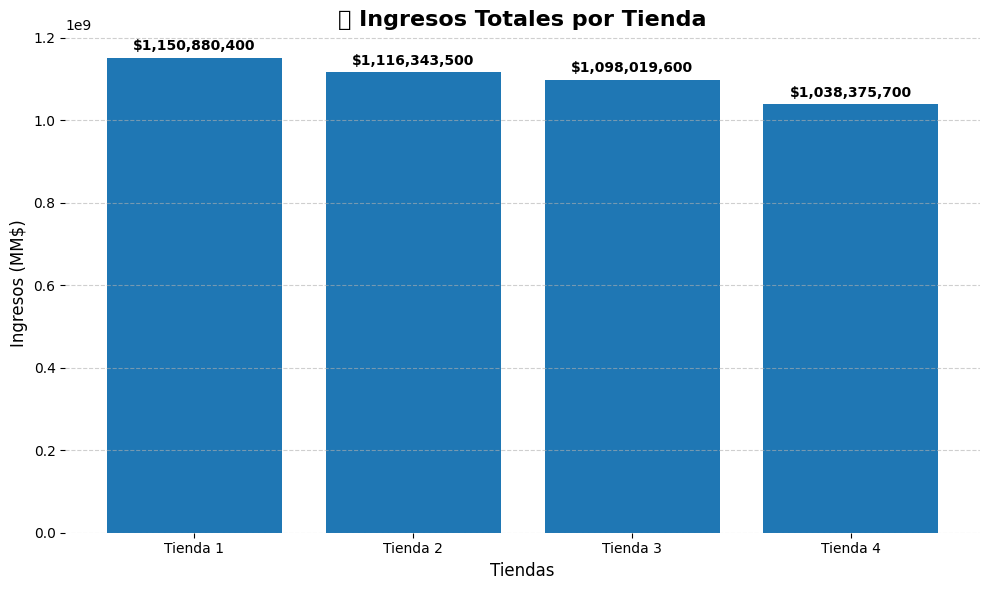

In [102]:
# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de barras
barras = plt.bar(tiendas, ingresos)

# Título y etiquetas
plt.title("💰 Ingresos Totales por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Ingresos (MM$)", fontsize=12)

# Agregar etiquetas de valores sobre cada barra (con formato moneda)
for barra, ingreso in zip(barras, ingresos):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + (max(ingresos)*0.01), f"${ingreso:,.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Quitar bordes y hacer que se vea más limpio
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Gráfico 2: Gráfico de barras - Ventas de "muebles" por tienda

In [103]:
# Extraer la cantidad de ventas de "Muebles" en cada tienda
ventas_muebles = {
    "Tienda 1": conteo1.get("Muebles", 0),
    "Tienda 2": conteo2.get("Muebles", 0),
    "Tienda 3": conteo3.get("Muebles", 0),
    "Tienda 4": conteo4.get("Muebles", 0)
}

# Convertimos a listas para graficar
tiendas = list(ventas_muebles.keys())
muebles_vendidos = list(ventas_muebles.values())

# Verificamos los datos
print("Tiendas:", tiendas)
print("Ventas de muebles:", muebles_vendidos)


Tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ventas de muebles: [465, 442, 499, 480]


<ipython-input-104-62de86e585c0>:26: UserWarning: Glyph 129681 (\N{CHAIR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129681 (\N{CHAIR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


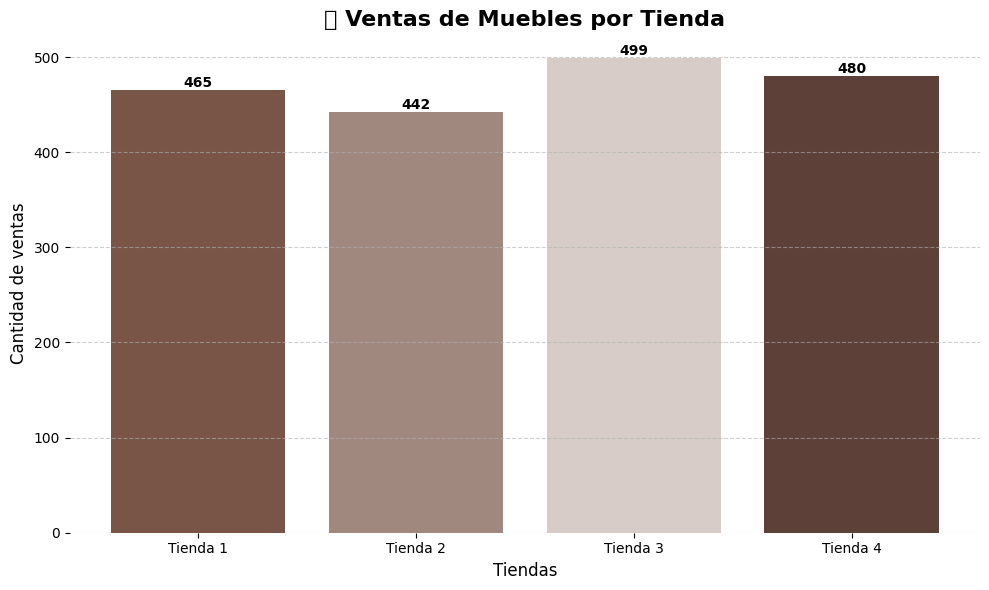

In [104]:
# Tamaño del gráfico
plt.figure(figsize=(10, 6))

# Colores personalizados (opcional)
colores = ['#795548', '#A1887F', '#D7CCC8', '#5D4037']

# Crear gráfico de barras
barras = plt.bar(tiendas, muebles_vendidos, color=colores)

# Títulos y etiquetas
plt.title("🪑 Ventas de Muebles por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Cantidad de ventas", fontsize=12)

# Etiquetas de cantidad sobre las barras
for barra, cantidad in zip(barras, muebles_vendidos):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, f"{cantidad}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.box(False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### Gráfico 3: Clasificación promedio por tienda

In [105]:
#diccionario con los promedios de calificaciones por tienda
ranking_calificaciones = {
    "Tienda 1": promedio_calificacion1,
    "Tienda 2": promedio_calificacion2,
    "Tienda 3": promedio_calificacion3,
    "Tienda 4": promedio_calificacion4
}

# Convertimos el diccionario en listas
tiendas = list(ranking_calificaciones.keys())
promedios = list(ranking_calificaciones.values())

# Verificamos los datos
print("Tiendas:", tiendas)
print("Calificación promedio:", promedios)


Tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Calificación promedio: [3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]


<ipython-input-106-01230beae7b5>:22: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


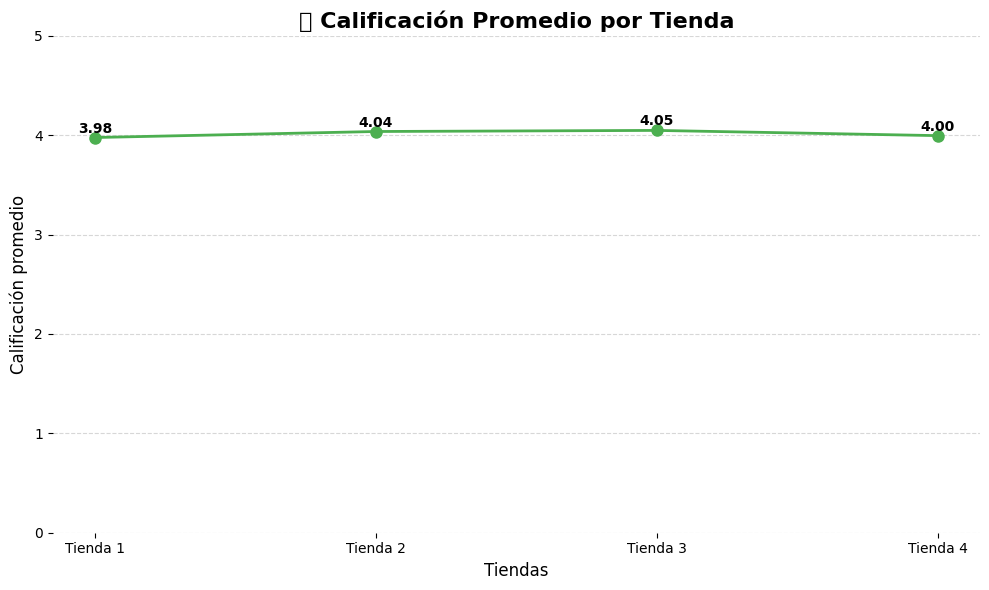

In [106]:
# Crear gráfico de líneas
plt.figure(figsize=(10, 6))

# Dibujar línea con marcadores
plt.plot(tiendas, promedios, marker='o', linestyle='-', color='#4CAF50', linewidth=2, markersize=8)

# Título y etiquetas
plt.title("⭐ Calificación Promedio por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tiendas", fontsize=12)
plt.ylabel("Calificación promedio", fontsize=12)
plt.ylim(0, 5)  # Escala típica para calificaciones

# Agregar texto sobre cada punto
for i, valor in enumerate(promedios):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha='center', fontsize=10, fontweight='bold')

# Estética
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.box(False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### Gráfico 4: Costo promedio de envío por tienda

In [107]:
# Utilizamos el ranking_envío calculado en el punto 5
ranking_envio = {
    "Tienda 1": prom_envio1,
    "Tienda 2": prom_envio2,
    "Tienda 3": prom_envio3,
    "Tienda 4": prom_envio4
}

# Convertimos el diccionario en listas para graficar
tiendas = list(ranking_envio.keys())
costos_envio = list(ranking_envio.values())

# Verificamos que los datos estén correctos
print("Tiendas:", tiendas)
print("Costos de envío promedio:", costos_envio)



Tiendas: ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Costos de envío promedio: [26018.60958033065, 25216.235693090293, 24805.680373039424, 23459.457167090754]


<ipython-input-108-ba4947122a19>:26: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


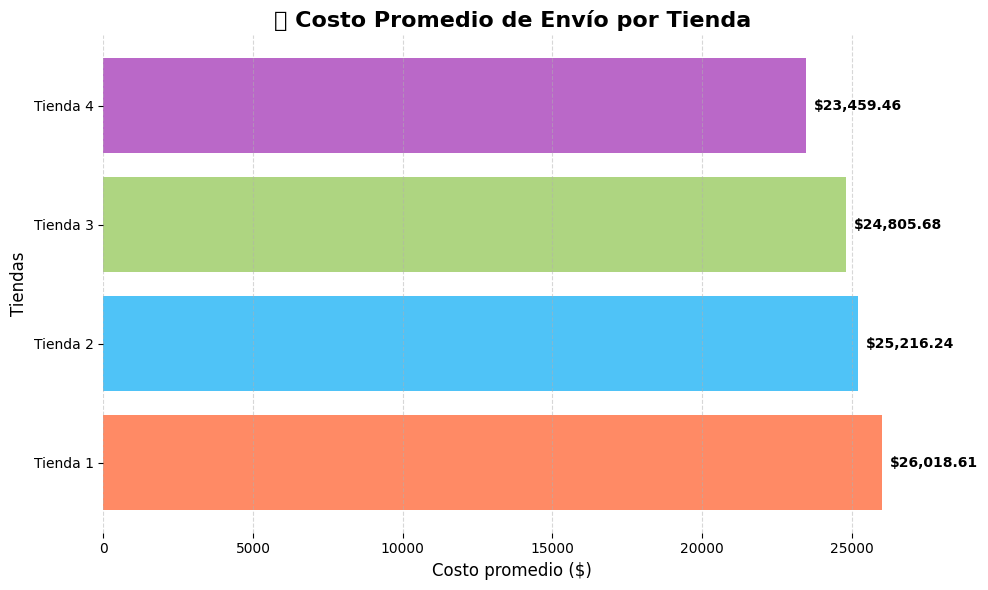

In [108]:
# Crear gráfico horizontal
plt.figure(figsize=(10, 6))

# Colores opcionales
colores = ['#FF8A65', '#4FC3F7', '#AED581', '#BA68C8']

# Dibujamos las barras horizontales
barras = plt.barh(tiendas, costos_envio, color=colores)

# Título y etiquetas
plt.title("🚚 Costo Promedio de Envío por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Costo promedio ($)", fontsize=12)
plt.ylabel("Tiendas", fontsize=12)

# Agregar etiquetas de valor con formato moneda
for barra, costo in zip(barras, costos_envio):
    ancho = barra.get_width()
    plt.text(ancho + max(costos_envio)*0.01, barra.get_y() + barra.get_height()/2,
             f"${costo:,.2f}", va='center', fontsize=10, fontweight='bold')

# Estética
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.box(False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


# **Resumen:**

#### En base a la información recabada de cada tienda y al análisis de datos generados se presenta el siguiente Resumen:

#### **Ingresos totales:** Las tiendas 4 y 3 respectivamente presentan el menor ingreso por ventas

#### **Ventas de la categoría más fuerte ("Muebles"):** Si bien "Muebles" es la categoría dominante en todas las tiendas, La tienda N°2 es la que presenta menores ventas en esta categoría, seguida por la tienda N°1, lo que muestra debilidad comercial en ciertas ubicaciones.

#### **Calificación promedio:** La percepción del cliente respecto a la calidad del servicio/producto es menor en la tienda N°1, lo que podría afectar la fidelización a largo plazo.

#### **Costo de envío promedio:**: Las tiendas 1 y 2 Presentan los costos logisticos más elevados, lo que impacta directamente en la rentabilidad por venta.

# **Conclusión: Se recomienda cerrar la Tienda N°1**

### **La Tienda 1**, a pesar de no tener el peor nivel de ingresos, muestra debilidad en **tres factores estratégicos clave:**

### **Baja venta de la categoría más relevante ("Muebles")**

### **Peor percepción de los clientes (calificación)**

### **Costos logísticos más altos**

#### Estos factores afectan su rentabilidad y sostenibilidad a largo plazo, por lo que se recomienda **cerrar esta tienda** y enfocar los recursos en las tiendas con mejor desempeño global.